In [61]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Iris Data

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

# 1. Cross Validation for Model Selection

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9333333333333333

In [11]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9555555555555556

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9111111111111111

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9555555555555556

In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [16]:
for train_index, test_index in kf.split(np.arange(10)):
    print(train_index, test_index)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [18]:
for train_index, test_index in kf.split(np.arange(8)):
    print(train_index, test_index)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5 7] [6]
[0 1 2 3 4 5 6] [7]


In [14]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return(model.score(X_test, y_test))

In [30]:
scores_lr = []
scores_svm = []
scores_rf = []
scores_knn = []

for train_index, test_index in kf.split(iris.data):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    
    scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))

D:\Anaconda3\envs\chong\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda3\envs\chong\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [46]:
print('''Average Classification Score
------------------------------
Logistic Regression: %.2f%%
Support Vector Machine: %.2f%%
Random Forest: %.2f%%
K-Nearest Neighbors: %.2f%%''' % (np.mean(scores_lr) * 100, np.mean(scores_svm) * 100, np.mean(scores_rf) * 100, np.mean(scores_knn) * 100))

Average Classification Score
------------------------------
Logistic Regression: 92.67%
Support Vector Machine: 89.33%
Random Forest: 90.67%
K-Nearest Neighbors: 91.33%


# 2. Cross Validation for Model Parameter Selction

In [25]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9736842105263158

In [26]:
from sklearn.model_selection import cross_val_score

scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores_knn

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [69]:
k_range = range(1, 40)
k_scores = []
k_mse = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(np.mean(scores))
    k_mse.append(np.mean(loss))

In [58]:
k_scores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334]

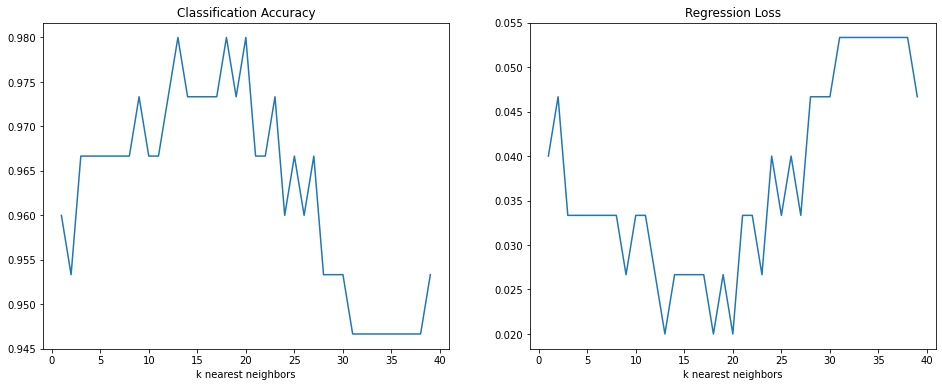

In [74]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].plot(k_range, k_scores)
ax[0].set_xlabel('k nearest neighbors')
ax[0].set_title('Classification Accuracy')

ax[1].plot(k_range, k_mse)
ax[1].set_xlabel('k nearest neighbors')
ax[1].set_title('Regression Loss')

plt.show()